In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
salary= pd.read_csv('ds_salaries.csv')

In [84]:
salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [85]:
salary=salary.drop(['salary','salary_currency','Unnamed: 0'], axis=1)

In [86]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


Most desired job

In [87]:
job_title = salary.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
job_title.columns = ['job_title', 'count']
job_title.head(10)

,job_title,count
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


In [88]:
import plotly.express as px
import plotly.graph_objects as go

In [89]:
fig=px.bar(job_title[:10],x='job_title', y='count', color='job_title', text='count',title='Top job Titles')

fig.update_layout(
    xaxis_title='job_title',
    yaxis_title='Count',
    )

Most desired jobs are Data Scientist, Data Engineer, Data Analyst!!

In [90]:
for i in range(salary.experience_level.shape[0]):
    if salary.experience_level[i]=='EN':
               salary.experience_level[i]='Entry Level';
    elif salary.experience_level[i]=='MI':
               salary.experience_level[i]='Mid Level';
    elif salary.experience_level[i]=='SE':
               salary.experience_level[i]='Senior Level';
    else:
               salary.experience_level[i]='Executive Level';

C:\Users\Ajay\AppData\Local\Temp\ipykernel_6776\615087820.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ajay\AppData\Local\Temp\ipykernel_6776\615087820.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ajay\AppData\Local\Temp\ipykernel_6776\615087820.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ajay\AppData\Local\Temp\ipykernel_6776\615087820.py:9: SettingWithCopyWarning:


A value is trying t

In [91]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level,FT,Data Scientist,79833,DE,0,DE,L
1,2020,Senior Level,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior Level,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid Level,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior Level,FT,Machine Learning Engineer,150000,US,50,US,L


In [92]:
salary.employment_type=salary.employment_type.replace('FT', 'FullTime')
salary.employment_type=salary.employment_type.replace('PT', 'PartTime')
salary.employment_type=salary.employment_type.replace('CT', 'Contract')
salary.employment_type=salary.employment_type.replace('FL', 'FreeLance')

In [93]:
salary.replace(['L','S','M'], ['Large','Small','Medium'], inplace=True)
salary.replace([0, 50, 100], ['On-Site','Hybrid','Remote'], inplace=True)

In [94]:
salary.shape

(607, 9)

<AxesSubplot:xlabel='remote_ratio', ylabel='Count'>

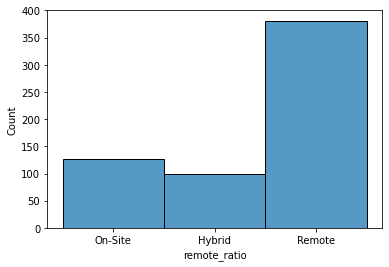

In [95]:
sns.histplot(x='remote_ratio', data=salary)

Most desired work preference is Remote!!!

# Starting salary of entry level employee

In [96]:
exp=salary.experience_level.value_counts()
exp

Senior Level       280
Mid Level          213
Entry Level         88
Executive Level     26
Name: experience_level, dtype: int64

In [103]:
g=px.bar(exp, x=exp.index, y=exp.values)
g.update_layout(
    font=dict(size=17))
g.show()

In [105]:
residence=salary.employee_residence.value_counts()
fig=px.bar(residence, x=residence.index, y=residence.values)
fig.update_layout(
    xaxis_title='residence',
    yaxis_title='Count',
    )
fig.show()

Countries where most of highest no. of employees reside are USA, Great Britain and India!!

# Company locations

In [110]:
loc=salary.company_location.value_counts()
fig=px.bar(loc, x=loc.index, y=loc.values)

fig.update_layout(
    xaxis_title='Company location',
    yaxis_title='Count')

Most of the companies are located in USA, Great Britain, Canada, Denmark and India!!

# Company size distribution

In [113]:
size=salary.company_size.value_counts()
size

Medium    326
Large     198
Small      83
Name: company_size, dtype: int64

In [116]:
fig=px.bar(size, x=size.index, y=size.values)

fig.update_layout(
    xaxis_title='Company_size',
    yaxis_title='Count')

most of the companies are medium sized!!

# year wise distribution 

In [128]:
group=salary.work_year.value_counts()
fig=px.pie(group, group.index, group.values, labels=group.index)

fig.update_layout(
    font=dict(size=17))


C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# multivariate analysis 

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

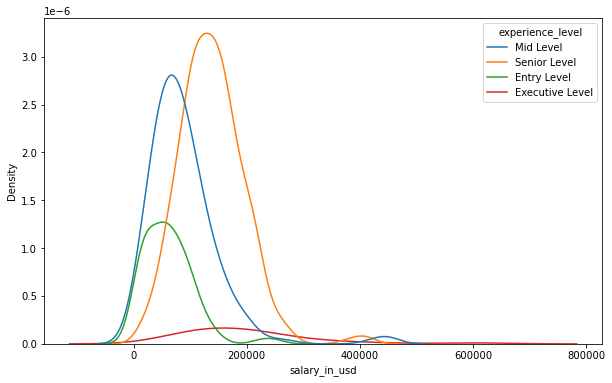

In [149]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=salary.salary_in_usd, hue=salary.experience_level,)

In [150]:
fig=px.box(x=salary.experience_level, y=salary.salary_in_usd,  )

fig.update_layout(
    xaxis_title='Experience level',
    yaxis_title='salary in USD ',
    title='Salary vs Experience Level'
)


In [170]:
avg=salary.groupby(['experience_level']).mean('salary_in_usd')

In [171]:
avg=avg.drop(['work_year'], axis=1)
avg

,salary_in_usd
experience_level,
Entry Level,61643.318182
Executive Level,199392.038462
Mid Level,87996.056338
Senior Level,138617.292857


In [174]:
sal_co_size=salary.groupby(['company_size']).mean('salary_in_usd')
sal_co_size=sal_co_size.drop(['work_year'], axis=1)
sal_co_size

,salary_in_usd
company_size,
Large,119242.994949
Medium,116905.466258
Small,77632.674699


In [176]:
sal_co_loc=salary.groupby(['company_location']).mean('salary_in_usd')
sal_co_loc=sal_co_loc.drop(['work_year'], axis=1)
sal_co_loc.head()

,salary_in_usd
company_location,
AE,100000.000000
AS,18053.000000
AT,72920.750000
AU,108042.666667
BE,85699.000000


In [177]:
work_year=salary.groupby(['work_year']).mean('salary_in_usd')

work_year

,salary_in_usd
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


In [182]:
job_title=salary.groupby(['job_title']).mean('salary_in_usd')
job_title=job_title.drop(['work_year'], axis=1)
job_title.head()

,salary_in_usd
job_title,
3D Computer Vision Researcher,5409.000000
AI Scientist,66135.571429
Analytics Engineer,175000.000000
Applied Data Scientist,175655.000000
Applied Machine Learning Scientist,142068.750000




1. Data scientist, Data Engineer and Data Analyst are top 3 job tiltes
2. According to the dataset, most number of people working from remote locations
3. The majority of the employee residences are located in the US, GB, and India
4. Can observe outliers in pay scale
5. Companies located in the USA, Japan, and Canada are paying the highest average pay to their employees
6. Data Architect, Machine Learning scientist,Data Scinece manager are top 3 job titles paying highest average salary
7. Average salary per year increasing gradually

8. Large companies offering average salary of ~119242 USD

        Medium companies offering average salary of ~116905 USD

        Small companies offering average salary of ~77632 USD

9. Average pay scale for entry level employees ~61643 USD  

        Average pay scale for mid level employees ~87996 USD

        Average pay scale for senior level employees ~138617 USD

        Average pay scale for executive level employees ~199392 USD 